<a href="https://colab.research.google.com/github/seungyoonnam/machine-learning/blob/main/wine_KNN_LR_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

레드와인과 화이트와인 분류

https://archive.ics.uci.edu/dataset/186/wine+quality
- 레드와인과 화이트와인 합친 뒤 분류
- 결측값을 아예 제거하거나 평균값을 넣어야한다.

#데이터 전처리

In [86]:

#데이터 불러오기
import pandas as pd
import numpy as np

rd = pd.read_csv('winequality-red.csv', delimiter=';')
rd['class']='red'
rd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [87]:
wh = pd.read_csv('winequality-white.csv', delimiter=';')
wh['class']='white'
wh.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [88]:
df=pd.concat([rd,wh],axis=0)
print(pd.unique(df['class']))

['red' 'white']


In [89]:
#결측치 확인
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [90]:
wine_input=df.drop(columns='class').to_numpy()
wine_target=df['class'].to_numpy()

In [91]:
#훈련세트 테스트세트 분리
from sklearn.model_selection import train_test_split

#stratify: 샘플링편향 방지
train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, random_state=42, stratify=wine_target)

In [92]:
#데이터 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_input = ss.transform(train_input)
test_input = ss.transform(test_input)

#KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9944581280788177
0.9926153846153846


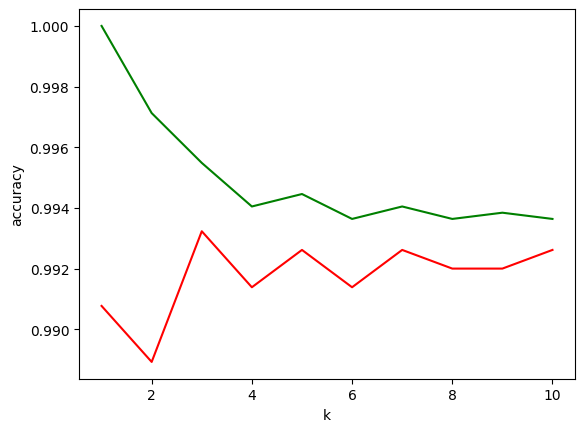

In [94]:
#최적화
import matplotlib.pyplot as plt

knn_test_score=[]
knn_train_score=[]

k_values=range(1,11)

for k in k_values:
  kn=KNeighborsClassifier(n_neighbors=k)
  kn.fit(train_input, train_target)
  knn_train_score.append(kn.score(train_input, train_target))
  knn_test_score.append(kn.score(test_input, test_target))

plt.plot(k_values, knn_train_score, color='green')
plt.plot(k_values, knn_test_score,color='red')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [95]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_input, train_target)

print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9954844006568144
0.9932307692307693


#Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.993431855500821
0.9913846153846154


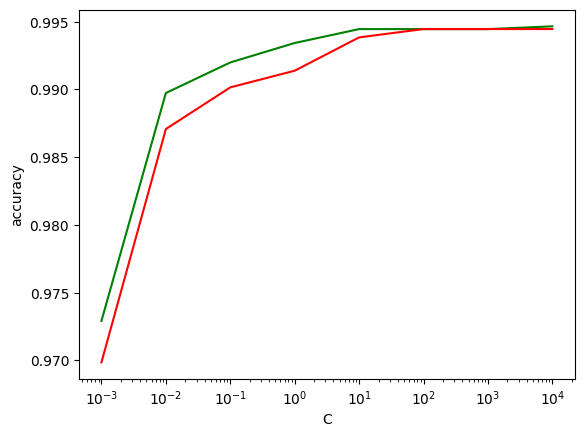

In [97]:
#최적화
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lr_train_score=[]
lr_test_score=[]

for C in C_values:
  lr = LogisticRegression(C=C)
  lr.fit(train_input, train_target)
  lr_train_score.append(lr.score(train_input, train_target))
  lr_test_score.append(lr.score(test_input, test_target))

plt.plot(C_values, lr_train_score, color='green')
plt.plot(C_values, lr_test_score, color='red')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [98]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100)
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9944581280788177
0.9944615384615385


#SGD

In [99]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', random_state=42)

sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.9940476190476191
0.9926153846153846


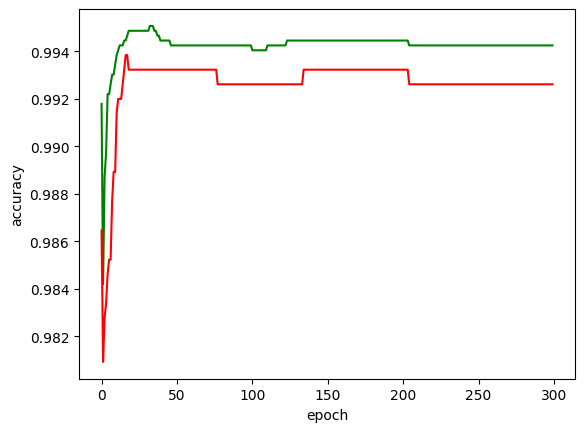

In [100]:
#최적화

sc = SGDClassifier(loss='log_loss', random_state=42)


sgd_train_score=[]
sgd_test_score=[]

classes=np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_input, train_target, classes=classes)
  sgd_train_score.append(sc.score(train_input, train_target))
  sgd_test_score.append(sc.score(test_input, test_target))

plt.plot(sgd_train_score, color='green')
plt.plot(sgd_test_score, color='red')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [101]:
sc = SGDClassifier(loss='log_loss', max_iter=60, tol=None, random_state=42)
sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.9948686371100164
0.9932307692307693
